In [59]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import List
import timeit
import time
import random
from IPython.display import clear_output
import numpy as np
import math


In [60]:
class Knapsack:
    def __init__(self, n=7, capacity=None, weights=None, values=None):
        if n is None:
            self.random_init()
        else:
            self.n = n
            self.capacity = capacity
            self.weights = weights
            self.values = values
            self.selection = [0] * n  # Initializing the selection with all items not selected

    # Method to initialize with random data
    def random_init(self):
        self.n = 5
        self.capacity = random.randint(10, 100)
        self.weights = [random.randint(1, 20) for _ in range(self.n)]
        self.values = [random.randint(1, 100) for _ in range(self.n)]
        self.selection = [0] * self.n  # Initializing the selection with all items not selected

    # Method to return the representation of the knapsack selection
    def representation(self):
        return self.selection

    # Class method to evaluate a solution
    @classmethod
    def evaluate_solution(cls, solution, weights, values, capacity):
        total_value = 0
        total_weight = 0
        for i in range(len(solution)):
            if solution[i] == 1:
                total_value += values[i]
                total_weight += weights[i]
                
        # TODO: Check if the solution is feasible
        feasibility = "???" # Check if the solution is feasible
        
        return total_value, total_weight, feasibility

    def __str__(self):
        return f"Knapsack(n={self.n}, capacity={self.capacity}, weights={self.weights}, values={self.values}, selection={self.selection})"


In [61]:
case2 = {
    "items": [(70, 31), (20, 10), (39, 20), (37, 19), (7, 4), (5, 3), (10, 6)],
    "capacity": 50
}
# Extracting the values and weights from the case2 dictionary
values_case2 = [item[0] for item in case2["items"]]
weights_case2 = [item[1] for item in case2["items"]]
capacity_case2 = case2["capacity"]
knapsack_instance_case2 = Knapsack(n=len(values_case2), capacity=capacity_case2, weights=weights_case2, values=values_case2)


\begin{array}{l}
\textbf{Algorithm: Dynamic Programming Solution2} \\
\hline
1: \text{Input:} \\
\quad n: \text{integer, number of items} \\
\quad capacity: \text{integer, maximum weight capacity of the knapsack} \\
\quad weights: \text{list of integers, weights of the items} \\
\quad values: \text{list of integers, values of the items} \\
2: \textbf{Output:} \\
\quad \text{solution: list of integers, representing the selected items in the optimal solution} \\
3: \textbf{Initialize:} \\
\quad dp\_table: \text{2D array of size (n+1) x (capacity+1), initialized to 0} \\
4: \textbf{Function Solve}(n, capacity, weights, values) \\
5: \quad \textbf{for} \ i \ \textbf{in range}(1, n+1) \ \textbf{do} \\
6: \quad \quad \textbf{for} \ w \ \textbf{in range}(capacity+1) \ \textbf{do} \\
7: \quad \quad \quad \textbf{if} \ \text{weights}[i - 1] \ \leq \ w \ \textbf{then} \\
8: \quad \quad \quad \quad dp\_table[i][w] \leftarrow \text{max}(dp\_table[i-1][w], dp\_table[i-1][w-weights[i-1]] + values[i-1]) \\
9: \quad \quad \quad \textbf{else} \\
10: \quad \quad \quad \quad dp\_table[i][w] \leftarrow dp\_table[i-1][w] \\
11: \quad \quad \quad \textbf{end if} \\
12: \quad \quad \textbf{end for} \\
13: \quad \textbf{end for} \\
14: \textbf{Procedure: Backtracking to Find Items in Optimal Solution} \\
15: \quad w \leftarrow \text{capacity} \\
16: \quad \text{solution} \leftarrow \text{list of zeros of length n} \\
17: \quad \textbf{for} \ i \ \textbf{in range}(n, 0, -1) \ \textbf{do} \\
18: \quad \quad \textbf{if} \ dp\_table[i][w] \ \neq \ dp\_table[i-1][w] \ \textbf{then} \\
19: \quad \quad \quad \text{solution}[i-1] \leftarrow 1 \\
20: \quad \quad \quad w \leftarrow w - \text{weights}[i-1] \\
21: \quad \quad \textbf{end if} \\
22: \quad \textbf{end for} \\
23: \textbf{Return:} \\
24: \quad \textbf{return} \ \text{solution} \\
\end{array}


In [62]:
class DP:
    def __init__(self, knapsack):
        self.knapsack = knapsack
        self.n = knapsack.n
        self.weights = knapsack.weights
        self.values = knapsack.values
        self.capacity = knapsack.capacity
        self.dp_table = [[0] * (self.capacity + 1) for _ in range(self.n + 1)]

    def solve(self):
        # Implementing the dynamic programming solution
        for i in range(1, self.n + 1):
            for w in range(self.capacity + 1):
                if self.weights[i - 1] <= w:
                    self.dp_table[i][w] = max(
                        self.dp_table[i - 1][w],
                        self.dp_table[i - 1][w - self.weights[i - 1]] + self.values[i - 1] 
                    )
                else:
                    self.dp_table[i][w] = self.dp_table[i - 1][w]

        # Backtracking to find the items included in the optimal solution
        w = self.capacity
        solution = [0] * self.n
        for i in range(self.n, 0, -1):
            if self.dp_table[i][w] != self.dp_table[i - 1][w]:
                solution[i - 1] = 1
                w -= self.weights[i - 1]

        return solution, self.dp_table[self.n][self.capacity]




In [63]:

# Creating a Knapsack instance with given data
DP_instance1 = Knapsack(n=4, capacity=11, weights=[2, 4, 6, 7], values=[6, 10, 12, 13])
# Creating a DP instance and finding the optimal solution
dp_instance = DP(knapsack=DP_instance1)
print("case 1: ",dp_instance.solve())


# Creating a Knapsack instance with the data from case 2
DP_instance2 = Knapsack(n=len(values_case2), capacity=capacity_case2, weights=weights_case2, values=values_case2)
# Creating a DP instance and finding the optimal solution
dp_instance = DP(knapsack=DP_instance2)
print("case2: ",dp_instance.solve())





case 1:  ([0, 1, 0, 1], 23)
case2:  ([1, 0, 0, 1, 0, 0, 0], 107)


\begin{array}{l}
\textbf{Algorithm: LocalSearch} \\
\hline
1: \text{Input:} \\
\quad \text{knapsack: object containing the properties n, weights, values, and capacity} \\
2: \textbf{Properties:} \\
\quad n: \text{integer, number of items in the knapsack (extracted from knapsack object)} \\
\quad weights: \text{list of integers, weights of the items (extracted from knapsack object)} \\
\quad values: \text{list of integers, values of the items (extracted from knapsack object)} \\
\quad capacity: \text{integer, maximum weight capacity of the knapsack (extracted from knapsack object)} \\
3: \textbf{Method GenerateNeighbors(solution)} \\
4: \quad \textbf{Input:} \\
\quad \quad \text{solution: list of integers representing the current solution} \\
5: \quad \textbf{Output:} \\
\quad \quad \text{neighbors: list of lists, containing all possible neighbors of the current solution} \\
6: \quad \textbf{Procedure:} \\
7: \quad \quad \textbf{for} \ i \ \textbf{in range}(n) \ \textbf{do} \\
8: \quad \quad \quad \text{neighbor} \leftarrow \text{solution copied} \\
9: \quad \quad \quad \text{neighbor}[i] \leftarrow 1 - \text{neighbor}[i] \\
10: \quad \quad \quad \text{Append neighbor to neighbors list} \\
11: \quad \quad \textbf{end for} \\
12: \quad \textbf{return} \ \text{neighbors} \\
13: \textbf{Method Evaluate(solution)} \\
14: \quad \textbf{Input:} \\
\quad \quad \text{solution: list of integers representing a potential solution} \\
15: \quad \textbf{Output:} \\
\quad \quad \text{total\_value: integer, total value of the selected items, penalized if the capacity is exceeded} \\
16: \quad \textbf{Procedure:} \\
17: \quad \quad \text{total\_value} \leftarrow \text{sum of values of selected items in solution} \\
18: \quad \quad \text{total\_weight} \leftarrow \text{sum of weights of selected items in solution} \\
19: \quad \quad \textbf{if} \ \text{total\_weight} \ > \ \text{capacity} \ \textbf{then} \\
20: \quad \quad \quad \text{total\_value} \leftarrow \text{total\_value - 1000 (penalty for exceeding capacity)} \\
21: \quad \quad \textbf{end if} \\
22: \quad \textbf{return} \ \text{total\_value} \\
23: \textbf{Method Solve()} \\
24: \quad \textbf{Output:} \\
\quad \quad \text{current\_solution: list of integers representing the optimal solution found} \\
\quad \quad \text{current\_value: integer, total value of the optimal solution found} \\
25: \quad \textbf{Procedure:} \\
26: \quad \quad \text{Initialize current\_solution with a random solution of length n} \\
27: \quad \quad \text{current\_value} \leftarrow \text{Evaluate(current\_solution)} \\
28: \quad \quad \textbf{while True do} \\
29: \quad \quad \quad \text{neighbors} \leftarrow \text{GenerateNeighbors(current\_solution)} \\
30: \quad \quad \quad \text{Evaluate all neighbors and find the best neighbor and its value} \\
31: \quad \quad \quad \textbf{if} \ \text{best neighbor value} \ \leq \ \text{current value} \ \textbf{then} \\
32: \quad \quad \quad \quad \text{Break the loop} \\
33: \quad \quad \quad \textbf{else} \\
34: \quad \quad \quad \quad \text{current\_solution} \leftarrow \text{best neighbor} \\
35: \quad \quad \quad \quad \text{current\_value} \leftarrow \text{best neighbor value} \\
36: \quad \quad \quad \textbf{end if} \\
37: \quad \quad \textbf{end while} \\
38: \quad \textbf{return} \ \text{current\_solution, current\_value} \\
\end{array}


In [64]:
class LocalSearch:
    def __init__(self, knapsack):
        self.knapsack = knapsack
        self.n = knapsack.n
        self.weights = knapsack.weights
        self.values = knapsack.values
        self.capacity = knapsack.capacity

    def generate_neighbors(self, solution):
        """Generate all possible neighbors of the current solution by flipping each bit."""
        neighbors = []
        for i in range(self.n):
            neighbor = solution.copy()
            neighbor[i] = 1 - neighbor[i]
            neighbors.append(neighbor)
        return neighbors

    def evaluate(self, solution):
        """Evaluate a solution with penalty for infeasible solutions."""
        total_value = sum(val if sel else 0 for val, sel in zip(self.values, solution))
        total_weight = sum(wt if sel else 0 for wt, sel in zip(self.weights, solution))

        # TODO: Apply a penalty for infeasible solutions
        if total_weight > self.capacity: # If the solution is infeasible, apply a penalty
            # Penalty value
            # Subtract the penalty from the total value
            # If the penalty is too high, set the total value to 0
            pass

        return total_value 

    def solve(self):
        """Implement the local search algorithm starting with a random solution and moving to the best neighbor at each step."""
        current_solution = [random.randint(0, 1) for _ in range(self.n)]  # Random initial solution
        current_value = self.evaluate(current_solution)

        while True:
            neighbors = self.generate_neighbors(current_solution)
            neighbors_values = [self.evaluate(neighbor) for neighbor in neighbors]

            best_neighbor_value = max(neighbors_values)
            best_neighbor = neighbors[neighbors_values.index(best_neighbor_value)]

            if best_neighbor_value <= current_value:
                break  # If no improvement is found, stop the search

            current_solution = best_neighbor
            current_value = best_neighbor_value

        return current_solution, current_value


In [65]:

knapsack_instance_case2 = Knapsack(n=len(values_case2), capacity=capacity_case2, weights=weights_case2, values=values_case2)


# Creating a LocalSearch instance with the knapsack instance created using case2 data
local_search_instance = LocalSearch(knapsack=knapsack_instance_case2)

# Finding a solution using local search algorithm
local_search_solution, local_search_value = local_search_instance.solve()

local_search_solution, local_search_value
print("use LS case2: ",local_search_solution, local_search_value)


use LS case2:  [1, 1, 0, 0, 0, 1, 1] 105


In [ ]:
class LocalIterativeSearch(LocalSearch):
    def __init__(self, knapsack, max_iterations=100):
        super().__init__(knapsack)
        self.max_iterations = max_iterations

    def solve(self):
        """Implement the local iterative search algorithm starting with a random solution and performing a local search in each iteration."""
        best_solution = [random.randint(0, 1) for _ in range(self.n)]  # Random initial solution
        best_value = self.evaluate(best_solution)

        for _ in range(self.max_iterations):
            # Generate a random solution as the starting point of the local search
            current_solution = [random.randint(0, 1) for _ in range(self.n)]
            local_search = LocalSearch(self.knapsack)
            # Perform a local search starting from the current solution
            current_solution, current_value = local_search.solve()

            # TODO If the new solution is better than the best solution found so far, update the best solution
            if current_value > best_value:
                best_solution = current_solution
                best_value = current_value

        return best_solution, best_value

# Example usage:
# Creating a LocalIterativeSearch instance with the knapsack instance created using case2 data and finding a solution
local_iterative_search_instance = LocalIterativeSearch(knapsack=knapsack_instance_case2)
local_iterative_search_solution, local_iterative_search_value = local_iterative_search_instance.solve()
print(local_iterative_search_solution, local_iterative_search_value)


[1, 0, 0, 1, 0, 0, 0] 107


\begin{array}{l}
\textbf{Algorithm: TabuSearch(tabu\_list\_size, max\_iterations)} \\
\hline
1: \quad \textbf{Input:} \\
\quad \quad \text{tabu\_list\_size: integer, size of the tabu list (default value is 5)} \\
\quad \quad \text{max\_iterations: integer, maximum number of iterations (default value is 100)} \\
2: \quad \textbf{Output:} \\
\quad \quad \text{best\_solution: list of integers, representing the best solution found} \\
\quad \quad \text{best\_value: integer, the value of the best solution found} \\
3: \quad \textbf{Initialize:} \\
\quad \quad \text{current\_solution with a random solution of length n} \\
\quad \quad \text{current\_value} \leftarrow \text{Evaluate(current\_solution)} \\
\quad \quad \text{best\_solution} \leftarrow \text{current\_solution} \\
\quad \quad \text{best\_value} \leftarrow \text{current\_value} \\
\quad \quad \text{tabu\_list} \leftarrow \text{empty list} \\
4: \quad \textbf{Procedure:} \\
5: \quad \quad \textbf{for} \ \_ \ \textbf{in range}(max\_iterations) \ \textbf{do} \\
6: \quad \quad \quad \text{neighbors} \leftarrow \text{GenerateNeighbors(current\_solution)} \\
7: \quad \quad \quad \text{Evaluate all neighbors and store their values in neighbors\_values list} \\
8: \quad \quad \quad \text{Initialize best\_neighbor and best\_neighbor\_value with None and -1 respectively} \\
9: \quad \quad \quad \textbf{for each} \ \text{neighbor, neighbor\_value in zip(neighbors, neighbors\_values)} \ \textbf{do} \\
10: \quad \quad \quad \quad \textbf{if} \ \text{neighbor\_value > best\_neighbor\_value and neighbor not in tabu\_list} \ \textbf{then} \\
11: \quad \quad \quad \quad \quad \text{best\_neighbor\_value} \leftarrow \text{neighbor\_value} \\
12: \quad \quad \quad \quad \quad \text{best\_neighbor} \leftarrow \text{neighbor} \\
13: \quad \quad \quad \quad \textbf{end if} \\
14: \quad \quad \quad \textbf{end for} \\
15: \quad \quad \quad \textbf{if} \ \text{best\_neighbor is None} \ \textbf{then} \\
16: \quad \quad \quad \quad \text{Break the loop} \\
17: \quad \quad \quad \textbf{end if} \\
18: \quad \quad \quad \text{Update current\_solution and current\_value with best\_neighbor and best\_neighbor\_value} \\
19: \quad \quad \quad \text{Append current\_solution to tabu\_list and remove the oldest solution if tabu\_list size exceeds tabu\_list\_size} \\
20: \quad \quad \quad \textbf{if} \ \text{current\_value > best\_value} \ \textbf{then} \\
21: \quad \quad \quad \quad \text{Update best\_solution and best\_value with current\_solution and current\_value} \\
22: \quad \quad \quad \textbf{end if} \\
23: \quad \quad \textbf{end for} \\
24: \quad \textbf{Return:} \\
25: \quad \quad \textbf{return} \ \text{best\_solution, best\_value} \\
\end{array}


In [67]:
class TabuSearch:
    def __init__(self, knapsack, tabu_list_size=5):
        self.knapsack = knapsack
        self.n = knapsack.n
        self.weights = knapsack.weights
        self.values = knapsack.values
        self.capacity = knapsack.capacity
        self.tabu_list_size = tabu_list_size
        self.tabu_list = []

    def generate_neighbors(self, solution):
        """Generate all possible neighbors of the current solution by flipping each bit."""
        neighbors = []
        for i in range(self.n):
            neighbor = solution.copy()
            neighbor[i] = 1 - neighbor[i]
            neighbors.append(neighbor)
        return neighbors

    def evaluate(self, solution):
        """Evaluate a solution with penalty for infeasible solutions."""
        total_value = sum(val if sel else 0 for val, sel in zip(self.values, solution))
        total_weight = sum(wt if sel else 0 for wt, sel in zip(self.weights, solution))

        if total_weight > self.capacity:
            penalty = 1000  # Penalty for exceeding the capacity
            total_value -= penalty
            if total_value < 0:
                total_value = 0 

        return total_value

    def solve(self, max_iterations=100):
        """Implement the tabu search algorithm starting with a random solution and moving to the best neighbor at each step."""
        current_solution = [random.randint(0, 1) for _ in range(self.n)]  # Random initial solution
        current_value = self.evaluate(current_solution)

        best_solution = current_solution
        best_value = current_value

        for _ in range(max_iterations):
            neighbors = self.generate_neighbors(current_solution)
            neighbors_values = [self.evaluate(neighbor) for neighbor in neighbors]

            # Finding the best neighbor that is not in the tabu list
            best_neighbor_value = -1
            best_neighbor = None
            for neighbor, neighbor_value in zip(neighbors, neighbors_values):
                if neighbor_value > best_neighbor_value and neighbor not in self.tabu_list:
                    best_neighbor_value = neighbor_value
                    best_neighbor = neighbor

            if best_neighbor is None:  # If all neighbors are in the tabu list, stop the search
                break

            current_solution = best_neighbor
            current_value = best_neighbor_value

            # Update the tabu list
            self.tabu_list.append(current_solution)
            if len(self.tabu_list) > self.tabu_list_size:
                # TODO: Remove the oldest solution from the tabu list
                pass

            # Update the best solution found so far
            if current_value > best_value:
                best_solution = current_solution
                best_value = current_value

        return best_solution, best_value


In [68]:

tabu_search_instance = TabuSearch(knapsack=knapsack_instance_case2, tabu_list_size=5)
tabu_search_solution, tabu_search_value = tabu_search_instance.solve(max_iterations=100)

print("use TS case2: ",tabu_search_solution, tabu_search_value)
print("use DP case2: ",dp_instance.solve())


use TS case2:  [1, 1, 1, 1, 0, 0, 1] -824
use DP case2:  ([1, 0, 0, 1, 0, 0, 0], 107)


\begin{array}{l}
\textbf{Algorithm: HillClimbing(max\_iterations)} \\
\hline
1: \quad \textbf{Input:} \\
\quad \quad \text{max\_iterations: integer, maximum number of iterations (default value is 100)} \\
2: \quad \textbf{Output:} \\
\quad \quad \text{current\_solution: list of integers, representing the best solution found} \\
\quad \quad \text{current\_value: integer, the value of the best solution found} \\
3: \quad \textbf{Initialize:} \\
\quad \quad \text{current\_solution with a random solution of length n} \\
\quad \quad \text{current\_value} \leftarrow \text{Evaluate(current\_solution)} \\
4: \quad \textbf{Procedure:} \\
5: \quad \quad \textbf{for} \ \_ \ \textbf{in range}(max\_iterations) \ \textbf{do} \\
6: \quad \quad \quad \text{neighbors} \leftarrow \text{GenerateNeighbors(current\_solution)} \\
7: \quad \quad \quad \text{Evaluate all neighbors and store their values in neighbors\_values list} \\
8: \quad \quad \quad \text{Find the best neighbor and its value} \\
9: \quad \quad \quad \textbf{if} \ \text{best\_neighbor\_value} \ \leq \ \text{current\_value} \ \textbf{then} \\
10: \quad \quad \quad \quad \text{Break the loop} \\
11: \quad \quad \quad \textbf{end if} \\
12: \quad \quad \quad \text{Update current\_solution and current\_value with best\_neighbor and best\_neighbor\_value} \\
13: \quad \quad \textbf{end for} \\
14: \quad \textbf{Return:} \\
15: \quad \quad \textbf{return} \ \text{current\_solution, current\_value} \\
\end{array}


In [69]:
class HillClimbing:
    def __init__(self, knapsack):
        self.knapsack = knapsack
        self.n = knapsack.n
        self.weights = knapsack.weights
        self.values = knapsack.values
        self.capacity = knapsack.capacity

    def generate_neighbors(self, solution):
        """Generate all possible neighbors of the current solution by flipping each bit."""
        neighbors = []
        for i in range(self.n):
            neighbor = solution.copy()
            neighbor[i] = 1 - neighbor[i]
            neighbors.append(neighbor)
        return neighbors

    def evaluate(self, solution):
        """Evaluate a solution with penalty for infeasible solutions."""
        total_value = sum(val if sel else 0 for val, sel in zip(self.values, solution))
        total_weight = sum(wt if sel else 0 for wt, sel in zip(self.weights, solution))

        if total_weight > self.capacity:
            penalty = 1000  # Penalty for exceeding the capacity
            total_value -= penalty
            if total_value < 0:
                total_value = 0

        return total_value

    def solve(self, max_iterations=100):
        """Implement the hill climbing algorithm starting with a random solution and moving to the best neighbor at each step."""
        current_solution = [random.randint(0, 1) for _ in range(self.n)]  # Random initial solution
        current_value = self.evaluate(current_solution)

        for _ in range(max_iterations):
            neighbors = self.generate_neighbors(current_solution)
            neighbors_values = [self.evaluate(neighbor) for neighbor in neighbors]
            
            # TODO Finding the best neighbor
            best_neighbor_value = ''
            best_neighbor = ''

            if best_neighbor_value <= current_value:
                break  # If no improvement is found, stop the search

            current_solution = best_neighbor
            current_value = best_neighbor_value

        return current_solution, current_value
    

In [70]:
# Creating a HillClimbing instance with the knapsack instance created using case2 data and finding a solution
hill_climbing_instance = HillClimbing(knapsack=knapsack_instance_case2)
hill_climbing_solution, hill_climbing_value = hill_climbing_instance.solve(max_iterations=100)


print("use HC case2: ",hill_climbing_solution, hill_climbing_value)



use HC case2:  [1, 0, 0, 0, 1, 1, 1] 92


#### Hill Climb Variant 1
Simple Hill Climbing Algorithm: Checking Adjacent Solutions
Best Improvement: Select the adjacent solution that improves the objective function the most (steepest descent/rise)
Under this strategy, the algorithm examines all nearby solutions and selects the one that improves the objective function value by the steepest ascent or steepest descent. This means that it will choose the best one of the current neighboring solutions and continue searching in that direction.

In [71]:
class SteepestAscentHillClimbing:
    def __init__(self, knapsack):
        self.knapsack = knapsack
        self.n = knapsack.n
        self.weights = knapsack.weights
        self.values = knapsack.values
        self.capacity = knapsack.capacity

    def generate_neighbors(self, solution):
        """Generate all possible neighbors of the current solution by flipping each bit."""
        neighbors = []
        for i in range(self.n):
            neighbor = solution.copy()
            neighbor[i] = 1 - neighbor[i]
            neighbors.append(neighbor)
        return neighbors

    def evaluate(self, solution):
        """Evaluate a solution with penalty for infeasible solutions."""
        total_value = sum(val if sel else 0 for val, sel in zip(self.values, solution))
        total_weight = sum(wt if sel else 0 for wt, sel in zip(self.weights, solution))

        if total_weight > self.capacity:
            penalty = 1000  # Penalty for exceeding the capacity
            total_value -= penalty
            if total_value < 0:
                total_value = 0

        return total_value

    def solve(self, max_iterations=100):
        """Implement the steepest ascent hill climbing algorithm starting with a random solution and moving to the best neighbor at each step."""
        current_solution = [random.randint(0, 1) for _ in range(self.n)]  # Random initial solution
        current_value = self.evaluate(current_solution)

        for _ in range(max_iterations):
            neighbors = self.generate_neighbors(current_solution)
            neighbors_values = [self.evaluate(neighbor) for neighbor in neighbors]

            best_neighbor_value = max(neighbors_values)
            best_neighbor = neighbors[neighbors_values.index(best_neighbor_value)]

            # In this variation, we move to the best neighbor even if it doesn't improve the solution
            # TODO: Implement the steepest ascent hill climbing algorithm
             # Move to the best neighbor
             # Update the current value

        return current_solution, current_value

# Creating a SteepestAscentHillClimbing instance with the knapsack instance created using case2 data and finding a solution
steepest_ascent_hill_climbing_instance = SteepestAscentHillClimbing(knapsack=knapsack_instance_case2)
steepest_ascent_hill_climbing_solution, steepest_ascent_hill_climbing_value = steepest_ascent_hill_climbing_instance.solve(max_iterations=100)

steepest_ascent_hill_climbing_solution, steepest_ascent_hill_climbing_value


([1, 1, 0, 0, 0, 0, 1], 100)

#### Hill Climbing Variant 2
Random restart hill climbing algorithm:
• Based on the simple hill climbing algorithm, randomly change the initial solution, perform multiple independent hill climbing, and return the best solution
• Actually perform multiple independent hill-climbing operations, using diversity to cover a wider search space
It runs a simple hill-climbing algorithm multiple times, starting from a different starting solution each time. It then returns the optimal solution found across all runs. The goal of this approach is to increase the chance of the algorithm finding a globally optimal solution, since different starting solutions may lead to different local optimal solutions.

In [72]:
class RandomRestartHillClimbing:
    def __init__(self, knapsack):
        self.knapsack = knapsack
        self.n = knapsack.n
        self.weights = knapsack.weights
        self.values = knapsack.values
        self.capacity = knapsack.capacity

    def generate_neighbors(self, solution):
        """Generate all possible neighbors of the current solution by flipping each bit."""
        neighbors = []
        for i in range(self.n):
            neighbor = solution.copy()
            neighbor[i] = 1 - neighbor[i]
            neighbors.append(neighbor)
        return neighbors

    def evaluate(self, solution):
        """Evaluate a solution with penalty for infeasible solutions."""
        total_value = sum(val if sel else 0 for val, sel in zip(self.values, solution))
        total_weight = sum(wt if sel else 0 for wt, sel in zip(self.weights, solution))

        if total_weight > self.capacity:
            penalty = 1000  # Penalty for exceeding the capacity
            total_value -= penalty
            if total_value < 0:
                total_value = 0

        return total_value

    def hill_climbing(self, initial_solution, max_iterations=100):
        """Implement the basic hill climbing algorithm starting with a given initial solution."""
        current_solution = initial_solution
        current_value = self.evaluate(current_solution)

        for _ in range(max_iterations):
            
            neighbors = self.generate_neighbors(current_solution)
            neighbors_values = [self.evaluate(neighbor) for neighbor in neighbors]

            best_neighbor_value = max(neighbors_values)
            best_neighbor = neighbors[neighbors_values.index(best_neighbor_value)]

            if best_neighbor_value <= current_value:
                break  # If no improvement is found, stop the search

            current_solution = best_neighbor
            current_value = best_neighbor_value

        return current_solution, current_value

    def solve(self, restarts=10, max_iterations=100):
        """Implement the random restart hill climbing algorithm with a specified number of restarts."""
        best_solution = None
        best_value = -1

        for _ in range(restarts):
            # TODO: Generate a random initial solution
             # Random initial solution for each restart
             # Perform hill climbing starting from the initial solution
            
            if value > best_value:
                best_solution = solution
                best_value = value

        return best_solution, best_value

# Creating a RandomRestartHillClimbing instance with the knapsack instance created using case2 data and finding a solution
random_restart_hill_climbing_instance = RandomRestartHillClimbing(knapsack=knapsack_instance_case2)
random_restart_hill_climbing_solution, random_restart_hill_climbing_value = random_restart_hill_climbing_instance.solve(restarts=10, max_iterations=100)

random_restart_hill_climbing_solution, random_restart_hill_climbing_value
print("use RRHC case2: ",random_restart_hill_climbing_solution, random_restart_hill_climbing_value)


use RRHC case2:  [1, 0, 0, 1, 0, 0, 0] 107


In [73]:
import random

class GeneticAlgorithm:
    def __init__(self, knapsack, population_size=50, mutation_rate=0.1, crossover_rate=0.8):
        self.knapsack = knapsack
        self.n = knapsack.n
        self.weights = knapsack.weights
        self.values = knapsack.values
        self.capacity = knapsack.capacity
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def initialize_population(self):
        """Initialize the population with random solutions."""
        return [[random.randint(0, 1) for _ in range(self.n)] for _ in range(self.population_size)]

    def fitness(self, solution):
        """Evaluate the fitness of a solution."""
        total_value = sum(val if sel else 0 for val, sel in zip(self.values, solution))
        total_weight = sum(wt if sel else 0 for wt, sel in zip(self.weights, solution))

        if total_weight > self.capacity:
            penalty = 1000  # Penalty for exceeding the capacity
            total_value -= penalty
            if total_value < 0:
                total_value = 0

        return total_value

    def selection(self, population):
        """Select individuals from the population based on their fitness."""
        fitnesses = [self.fitness(ind) for ind in population]
        total_fitness = sum(fitnesses)

        # TODO: Implement fitness proportionate selection
        probabilities = [] # Calculate the probability of each individual being selected
        
        selected_individuals = random.choices(population, probabilities, k=self.population_size)
        return selected_individuals

    def crossover(self, parent1, parent2):
        """Perform crossover between two parents to produce two offspring."""
        if random.random() < self.crossover_rate:
            crossover_point = random.randint(1, self.n - 1)
            offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
            offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
        else:
            offspring1, offspring2 = parent1, parent2

        return offspring1, offspring2

    def mutation(self, individual):
        """Perform mutation on an individual with a certain probability."""
        for i in range(self.n):
            if random.random() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def evolve_population(self, population):
        """Evolve the population through selection, crossover and mutation."""
        new_population = []
        selected_individuals = self.selection(population)
        for i in range(0, self.population_size, 2):
            parent1 = selected_individuals[i]
            parent2 = selected_individuals[i+1]
            offspring1, offspring2 = self.crossover(parent1, parent2)
            
            new_population.append(self.mutation(offspring1))
            new_population.append(self.mutation(offspring2))
        return new_population

    def solve(self, generations=100):
        """Solve the problem using the genetic algorithm."""
        population = self.initialize_population()
        best_solution = max(population, key=self.fitness)
        best_fitness = self.fitness(best_solution)

        for _ in range(generations):
            population = self.evolve_population(population)
            current_best_solution = max(population, key=self.fitness)
            current_best_fitness = self.fitness(current_best_solution)

            if current_best_fitness > best_fitness:
                best_solution = current_best_solution
                best_fitness = current_best_fitness

        return best_solution, best_fitness


In [74]:

# Creating a GeneticAlgorithm instance with the knapsack instance created using case2 data and finding a solution
genetic_algorithm_instance = GeneticAlgorithm(knapsack=knapsack_instance_case2)
genetic_algorithm_solution, genetic_algorithm_value = genetic_algorithm_instance.solve(generations=100)

genetic_algorithm_solution, genetic_algorithm_value
print("use GA case2: ",genetic_algorithm_solution, genetic_algorithm_value)



use GA case2:  [1, 0, 0, 1, 0, 0, 0] 107


In [75]:
class AntColonyOptimization:
    def __init__(self, knapsack, num_ants=20, evaporation_rate=0.1, intensification_factor=2, alpha=1, beta=2):
        self.knapsack = knapsack
        self.n = knapsack.n
        self.weights = knapsack.weights
        self.values = knapsack.values
        self.capacity = knapsack.capacity
        self.num_ants = num_ants
        self.evaporation_rate = evaporation_rate 
        self.intensification_factor = intensification_factor 
        self.alpha = alpha  # Importance of pheromone levels
        self.beta = beta  # Importance of heuristic information
        self.pheromone_levels = [[1 for _ in range(self.n)] for _ in range(self.num_ants)]

    def heuristic_information(self, solution, item_index):
        """Calculate the heuristic information (value-to-weight ratio) of adding an item to the solution."""
        if solution[item_index] == 0 and sum(w if s else 0 for w, s in zip(self.weights, solution)) + self.weights[item_index] <= self.capacity:
            return self.values[item_index] / self.weights[item_index]
        return 0

    def transition_probability(self, solution, item_index, ant_index):
        """Calculate the transition probability of adding an item to the solution."""
        numerator = (self.pheromone_levels[ant_index][item_index] ** self.alpha) * (self.heuristic_information(solution, item_index) ** self.beta)
        denominator = sum((self.pheromone_levels[ant_index][j] ** self.alpha) * (self.heuristic_information(solution, j) ** self.beta) for j in range(self.n))
        return numerator / denominator if denominator != 0 else 0

    def construct_solution(self, ant_index):
        """Construct a solution using the probabilistic transition rules."""
        solution = [0] * self.n
        for _ in range(self.n):
            probabilities = [self.transition_probability(solution, i, ant_index) for i in range(self.n)]
            total_probability = sum(probabilities)
            probabilities = [prob / total_probability if total_probability != 0 else 0 for prob in probabilities]
            item_index = random.choices(range(self.n), probabilities)[0]
            solution[item_index] = 1 if self.heuristic_information(solution, item_index) > 0 else 0
        return solution

    def update_pheromone_levels(self, solutions, fitness_values):
        """Update the pheromone levels on the paths based on the solutions found."""
        best_solution_index = fitness_values.index(max(fitness_values))
        for i in range(self.n):
            for j in range(self.num_ants):
                # TODO: Update the pheromone level on the path between the j-th ant and the i-th item
                self.pheromone_levels[j][i] = '???'
                if solutions[best_solution_index][i] == 1:
                    # TODO: Apply the intensification factor to the pheromone level on the path between the j-th ant and the i-th item
                    self.pheromone_levels[j][i] += '???'

    def fitness(self, solution):
        """Evaluate the fitness of a solution."""
        total_value = sum(val if sel else 0 for val, sel in zip(self.values, solution))
        total_weight = sum(wt if sel else 0 for wt, sel in zip(self.weights, solution))

        if total_weight > self.capacity:
            return 0  # The solution is not feasible

        return total_value

    def solve(self, generations=100):
        """Solve the problem using the ant colony optimization algorithm."""
        best_solution = None
        best_fitness = 0

        for _ in range(generations):
            solutions = [self.construct_solution(i) for i in range(self.num_ants)]
            fitness_values = [self.fitness(sol) for sol in solutions]
            self.update_pheromone_levels(solutions, fitness_values)

            generation_best_solution = solutions[fitness_values.index(max(fitness_values))]
            generation_best_fitness = max(fitness_values)

            if generation_best_fitness > best_fitness:
                best_solution = generation_best_solution
                best_fitness = generation_best_fitness

        return best_solution, best_fitness


In [76]:

# Creating an AntColonyOptimization instance with the knapsack instance created using case2 data and finding a solution
aco_instance = AntColonyOptimization(knapsack=knapsack_instance_case2)
aco_solution, aco_value = aco_instance.solve(generations=100)

aco_solution, aco_value


([1, 0, 0, 1, 0, 0, 0], 107)

Simulated Annealing Algorithm with different 

In [84]:

class SimulatedAnnealing:
    def __init__(self, knapsack, initial_temperature=100, cooling_schedule='linear', alpha=0.95, delta_t=1, lambda_val=0.01):
        self.knapsack = knapsack
        self.n = knapsack.n
        self.weights = knapsack.weights
        self.values = knapsack.values
        self.capacity = knapsack.capacity
        self.temperature = initial_temperature
        self.cooling_schedule = cooling_schedule
        self.alpha = alpha
        self.delta_t = delta_t
        self.lambda_val = lambda_val

    def initialize_solution(self):
        """Initialize a random solution."""
        return [random.randint(0, 1) for _ in range(self.n)]

    def neighbor_solution(self, solution):
        """Get a neighbor solution by flipping a random bit."""
        neighbor_solution = solution.copy()
        flip_index = random.randint(0, self.n - 1)
        neighbor_solution[flip_index] = 1 - neighbor_solution[flip_index]
        return neighbor_solution

    def fitness(self, solution):
        """Evaluate the fitness of a solution."""
        total_value = sum(val if sel else 0 for val, sel in zip(self.values, solution))
        total_weight = sum(wt if sel else 0 for wt, sel in zip(self.weights, solution))

        if total_weight > self.capacity:
            penalty = 1000  # Penalty for exceeding the capacity
            total_value -= penalty
            if total_value < 0:
                total_value = 0
                
        return total_value

    def cool_down(self, time_step):
        """Cool down the temperature according to the selected schedule."""
        if self.cooling_schedule == 'linear':
            # TODO: Implement linear cooling schedule
            self.temperature = '???'
        elif self.cooling_schedule == 'geometric':
            # TODO: Implement geometric cooling schedule
            self.temperature = '???'
        elif self.cooling_schedule == 'exponential':
            self.temperature = self.temperature * math.exp(-self.lambda_val * time_step)

    def solve(self, generations=100):
        """Solve the problem using the simulated annealing algorithm."""
        current_solution = self.initialize_solution()
        current_fitness = self.fitness(current_solution)
        best_solution = current_solution
        best_fitness = current_fitness

        for t in range(generations):
            self.cool_down(t)
            if self.temperature <= 0:
                break
            
            neighbor_sol = self.neighbor_solution(current_solution)
            neighbor_fitness = self.fitness(neighbor_sol)

            if neighbor_fitness > current_fitness or random.random() < math.exp((neighbor_fitness - current_fitness) / self.temperature):
                # TODO: Update the current solution and fitness
                current_solution = '???'
                current_fitness = '???'

            if current_fitness > best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness

        return best_solution, best_fitness

# Creating instances of SimulatedAnnealing with different cooling schedules and finding solutions
sa_linear = SimulatedAnnealing(knapsack=knapsack_instance_case2, cooling_schedule='linear')
sa_geometric = SimulatedAnnealing(knapsack=knapsack_instance_case2, cooling_schedule='geometric')
sa_exponential = SimulatedAnnealing(knapsack=knapsack_instance_case2, cooling_schedule='exponential')

solution_linear, value_linear = sa_linear.solve(generations=100)
solution_geometric, value_geometric = sa_geometric.solve(generations=100)
solution_exponential, value_exponential = sa_exponential.solve(generations=100)

(solution_linear, value_linear), (solution_geometric, value_geometric), (solution_exponential, value_exponential)


(([1, 1, 0, 0, 0, 0, 1], 100),
 ([0, 1, 1, 0, 1, 1, 1], 81),
 ([0, 0, 1, 1, 1, 0, 1], 93))

In [85]:
class SimulatedAnnealing:
    def __init__(self, knapsack, initial_temperature=100, cooling_schedule='linear', alpha=0.95, delta_t=1, lambda_val=0.01, beta=0.1):
        self.knapsack = knapsack
        self.n = knapsack.n
        self.weights = knapsack.weights
        self.values = knapsack.values
        self.capacity = knapsack.capacity
        self.temperature = initial_temperature
        self.initial_temperature = initial_temperature
        self.cooling_schedule = cooling_schedule
        self.alpha = alpha
        self.delta_t = delta_t
        self.lambda_val = lambda_val
        self.beta = beta

    def initialize_solution(self):
        """Initialize a random solution."""
        return [random.randint(0, 1) for _ in range(self.n)]

    def neighbor_solution(self, solution):
        """Get a neighbor solution by flipping a random bit."""
        neighbor_solution = solution.copy()
        flip_index = random.randint(0, self.n - 1)
        neighbor_solution[flip_index] = 1 - neighbor_solution[flip_index]
        return neighbor_solution

    def fitness(self, solution):
        """Evaluate the fitness of a solution."""
        total_value = sum(val if sel else 0 for val, sel in zip(self.values, solution))
        total_weight = sum(wt if sel else 0 for wt, sel in zip(self.weights, solution))

        if total_weight > self.capacity:
            penalty = 1000  # Penalty for exceeding the capacity
            total_value -= penalty
            if total_value < 0:
                total_value = 0

        return total_value

    def cool_down(self, time_step):
        """Cool down the temperature according to the selected schedule."""
        if self.cooling_schedule == 'linear':
            self.temperature -= self.delta_t
        elif self.cooling_schedule == 'geometric':
            self.temperature *= self.alpha
        elif self.cooling_schedule == 'exponential':
            self.temperature = self.initial_temperature * math.exp(-self.lambda_val * time_step)
        elif self.cooling_schedule == 'lundy_and_mees':
            # TODO: Implement Lundy and Mees cooling schedule
            self.temperature = '???'
        elif self.cooling_schedule == 'logarithmic':
            self.temperature = self.initial_temperature / (1 + math.log(1 + time_step))

    def solve(self, generations=100):
        """Solve the problem using the simulated annealing algorithm."""
        current_solution = self.initialize_solution()
        current_fitness = self.fitness(current_solution)
        best_solution = current_solution
        best_fitness = current_fitness

        for t in range(generations):
            self.cool_down(t)
            if self.temperature <= 0:
                break
            
            neighbor_sol = self.neighbor_solution(current_solution)
            neighbor_fitness = self.fitness(neighbor_sol)

            if neighbor_fitness > current_fitness or random.random() < math.exp((neighbor_fitness - current_fitness) / self.temperature):
                current_solution = neighbor_sol
                current_fitness = neighbor_fitness

            if current_fitness > best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness

        return best_solution, best_fitness

# Creating instances of SimulatedAnnealing with different cooling schedules and finding solutions
sa_linear = SimulatedAnnealing(knapsack=knapsack_instance_case2, cooling_schedule='linear')
sa_geometric = SimulatedAnnealing(knapsack=knapsack_instance_case2, cooling_schedule='geometric')
sa_exponential = SimulatedAnnealing(knapsack=knapsack_instance_case2, cooling_schedule='exponential')
sa_lundy_and_mees = SimulatedAnnealing(knapsack=knapsack_instance_case2, cooling_schedule='lundy_and_mees')
sa_logarithmic = SimulatedAnnealing(knapsack=knapsack_instance_case2, cooling_schedule='logarithmic')

solution_linear, value_linear = sa_linear.solve(generations=1000)
solution_geometric, value_geometric = sa_geometric.solve(generations=1000)
solution_exponential, value_exponential = sa_exponential.solve(generations=1000)
solution_lundy_and_mees, value_lundy_and_mees = sa_lundy_and_mees.solve(generations=1000)
solution_logarithmic, value_logarithmic = sa_logarithmic.solve(generations=1000)

(solution_linear, value_linear), (solution_geometric, value_geometric), (solution_exponential, value_exponential), (solution_lundy_and_mees, value_lundy_and_mees), (solution_logarithmic, value_logarithmic)

(([0, 0, 1, 1, 1, 0, 1], 93),
 ([1, 1, 0, 0, 0, 1, 1], 105),
 ([1, 1, 0, 0, 1, 1, 0], 102),
 ([0, 1, 0, 1, 1, 1, 1], 79),
 ([1, 1, 0, 0, 0, 1, 1], 105))

In [86]:
from timeit import default_timer as timer

def test_cooling_schedules( knapsack_instance):
    cooling_schedules = [
        'linear', 
        'geometric', 
        'exponential', 
        'lundy_and_mees', 
        'logarithmic'
    ]
    
    results = {}
    
    for schedule in cooling_schedules:
        results[schedule] = {"time": [], "lengths": []}
        total_time = 0
        sa = SimulatedAnnealing(knapsack=knapsack_instance, cooling_schedule=schedule)
        start_time = timer()
        _, value = sa.solve(generations=10000)
        end_time = timer()
        total_time += (end_time - start_time)
        results[schedule]["lengths"].append(value)
        results[schedule]["time"] = total_time
    
    return results

# Example usage with knapsack_instance_case2 as a placeholder, replace with actual instance


test_cooling_schedules( knapsack_instance_case2)


{'linear': {'time': 0.0008240999959525652, 'lengths': [92]},
 'geometric': {'time': 0.03296940000291215, 'lengths': [105]},
 'exponential': {'time': 0.03268380000372417, 'lengths': [105]},
 'lundy_and_mees': {'time': 0.03545000000303844, 'lengths': [96]},
 'logarithmic': {'time': 0.03527580000081798, 'lengths': [107]}}

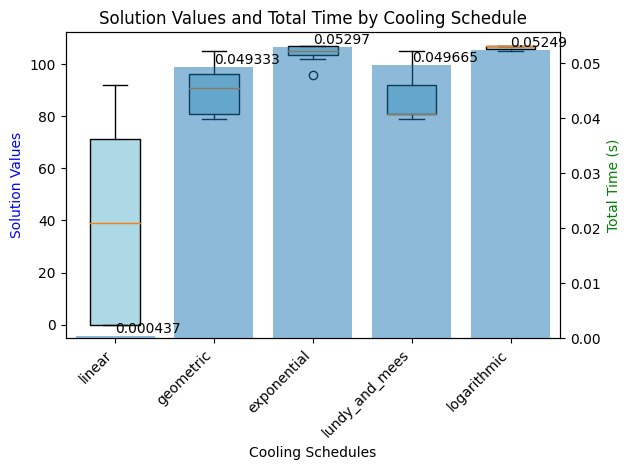

In [89]:
import matplotlib.pyplot as plt

# Data
data = {
    'linear': {'values': [92, 71, 74, 88, 62, 39, 15, 0, 0, 64, 72, 0, 0, 17, 0], 'total_time': 0.000436700000136625}, 
    'geometric': {'values': [91, 102, 88, 79, 105, 81, 91, 91, 81, 91, 79, 102, 81, 102, 79], 'total_time': 0.04933280000113882}, 
    'exponential': {'values': [105, 107, 105, 96, 105, 107, 107, 105, 107, 102, 102, 102, 105, 107, 105], 'total_time': 0.05297029999928782}, 
    'lundy_and_mees': {'values': [102, 91, 102, 93, 88, 105, 79, 81, 81, 79, 81, 81, 91, 81, 81], 'total_time': 0.04966499999864027}, 
    'logarithmic': {'values': [107, 105, 105, 107, 107, 107, 107, 107, 107, 105, 105, 107, 107, 107, 107], 'total_time': 0.05249040000489913}
}

# Extract values and total times for each cooling schedule
values = [data[schedule]['values'] for schedule in data]
times = [data[schedule]['total_time'] for schedule in data]
schedules = list(data.keys())

# Initialize the figure
fig, ax1 = plt.subplots()

# Create a boxplot for the solution values
bp = ax1.boxplot(values, labels=schedules, patch_artist=True, positions=[i for i in range(len(schedules))])

# Change the color of boxplot
for box in bp['boxes']:
    box.set_facecolor('lightblue')

# Create a bar plot for the total times
ax2 = ax1.twinx()
bars = ax2.bar([i for i in range(len(schedules))], times, alpha=0.5)

# Adding labels and title
ax1.set_xlabel('Cooling Schedules')
ax1.set_ylabel('Solution Values', color='blue')
ax2.set_ylabel('Total Time (s)', color='green')
plt.title('Solution Values and Total Time by Cooling Schedule')

# Rotate x-axis labels for better visibility
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 6), va='bottom')  # va: vertical alignment

# Adjust layout to prevent labels from being clipped
plt.tight_layout()

# Show the plot
plt.show()

